# 2.2 CNN & RNN Models

### Contents:
1. Install Libraries
2. Import Libraries
3. Import Datasets
4. Prepare Data
5. Split Data
6. CNN Model
7. CNN w/ Added Convolution & Pooling Layers
8. RNN Model
9. LSTM Model
10. RNN Model w/ Scaled Data
11. Export Datasets

## 1. Install Libraries

In [119]:
pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 MB 8.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 7.8 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 9.7 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 9.1 MB/s eta 0:00:00ta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [125]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


## 2. Import Libraries

In [638]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from numpy import unique
from numpy import reshape
from tensorflow.keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling1D
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## 3. Import Datasets

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
path = os.getcwd()
path

'/Users/kirstencurrie/ClimateWins Analysis/02 Scripts'

In [9]:
path = '/Users/kirstencurrie/ClimateWins Analysis'

In [17]:
climate = pd.read_csv(os.path.join(path, '01 Datasets', '01 Original Data', 'Dataset-weather-prediction-dataset-processed.csv'))
climate.head(1)

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,GDANSK_cloud_cover,GDANSK_humidity,GDANSK_precipitation,GDANSK_snow_depth,GDANSK_temp_mean,GDANSK_temp_min,GDANSK_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,ROMA_cloud_cover,ROMA_wind_speed,ROMA_humidity,ROMA_pressure,ROMA_sunshine,ROMA_temp_mean,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.0,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,7.7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,5.4,0.83,1.0161,0.12,0.08,0,0.0,10.0,7.0,11.5,8,0.91,0.0,0,0.8,-0.3,1.6,7,0.91,1.001,0.13,0.22,0,0.0,10.6,9.4,8.3,2.9,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.4,1.0,1.0173,0.2,0.0,0.0,-0.6,-1.9,0.5,7,8.7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.0,0.92,1.026,0.53,0.0,1.4,7.6,4.4,10.8,5,0.67,0.2,0.1,0,0.0,6.9,1.1,10.4,8,4.0,0.98,0.9978,0.04,1.14,0,0.0,4.9,3.8,5.9,3,2.6,0.73,1.0152,7.1,7.8,4,4.5,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,3.8,0.76,1.0169,1.54,0.44,10.0,7.8,12.2,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9


In [111]:
pleasant = pd.read_csv(os.path.join(path, '01 Datasets', '01 Original Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))
pleasant.shape

(22950, 16)

## 4. Prepare Data

In [24]:
#Drop Date & Month Columns from weather observations
cl = climate.drop(['DATE', 'MONTH'], axis=1)
cl.head(1)

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,GDANSK_cloud_cover,GDANSK_humidity,GDANSK_precipitation,GDANSK_snow_depth,GDANSK_temp_mean,GDANSK_temp_min,GDANSK_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,ROMA_cloud_cover,ROMA_wind_speed,ROMA_humidity,ROMA_pressure,ROMA_sunshine,ROMA_temp_mean,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,7,2.1,0.85,1.018,0.32,0.09,0,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.0,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,7.7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,5.4,0.83,1.0161,0.12,0.08,0,0.0,10.0,7.0,11.5,8,0.91,0.0,0,0.8,-0.3,1.6,7,0.91,1.001,0.13,0.22,0,0.0,10.6,9.4,8.3,2.9,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.4,1.0,1.0173,0.2,0.0,0.0,-0.6,-1.9,0.5,7,8.7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.0,0.92,1.026,0.53,0.0,1.4,7.6,4.4,10.8,5,0.67,0.2,0.1,0,0.0,6.9,1.1,10.4,8,4.0,0.98,0.9978,0.04,1.14,0,0.0,4.9,3.8,5.9,3,2.6,0.73,1.0152,7.1,7.8,4,4.5,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,3.8,0.76,1.0169,1.54,0.44,10.0,7.8,12.2,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9


In [113]:
#drop Date from pleasantness predictions
pl = pleasant.drop(['DATE'], axis=1)
pl.shape

(22950, 15)

In [28]:
cl.columns.unique().tolist()

['BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_

In [36]:
#Drop Roma, Tours, Gdansk Stations
cols_drop = cl[['ROMA_cloud_cover',
 'ROMA_wind_speed',
 'ROMA_humidity',
 'ROMA_pressure',
 'ROMA_sunshine',
 'ROMA_temp_mean',
 'TOURS_wind_speed',
 'TOURS_humidity',
 'TOURS_pressure',
 'TOURS_global_radiation',
 'TOURS_precipitation',
 'TOURS_temp_mean',
 'TOURS_temp_min',
 'TOURS_temp_max',
 'GDANSK_cloud_cover',
 'GDANSK_humidity',
 'GDANSK_precipitation',
 'GDANSK_snow_depth',
 'GDANSK_temp_mean',
 'GDANSK_temp_min',
 'GDANSK_temp_max']]

In [44]:
cl_2 = cl.drop(['ROMA_cloud_cover',
 'ROMA_wind_speed',
 'ROMA_humidity',
 'ROMA_pressure',
 'ROMA_sunshine',
 'ROMA_temp_mean',
 'TOURS_wind_speed',
 'TOURS_humidity',
 'TOURS_pressure',
 'TOURS_global_radiation',
 'TOURS_precipitation',
 'TOURS_temp_mean',
 'TOURS_temp_min',
 'TOURS_temp_max',
 'GDANSK_cloud_cover',
 'GDANSK_humidity',
 'GDANSK_precipitation',
 'GDANSK_snow_depth',
 'GDANSK_temp_mean',
 'GDANSK_temp_min',
 'GDANSK_temp_max'], axis=1)
cl_2.shape

(22950, 147)

In [84]:
zero_counts = (cl_2 == 0).sum()
for column, count in zero_counts.items():
    print(f"{column}: {count}")

BASEL_cloud_cover: 917
BASEL_wind_speed: 6
BASEL_humidity: 0
BASEL_pressure: 0
BASEL_global_radiation: 0
BASEL_precipitation: 12337
BASEL_snow_depth: 21425
BASEL_sunshine: 4236
BASEL_temp_mean: 48
BASEL_temp_min: 99
BASEL_temp_max: 32
BELGRADE_cloud_cover: 2550
BELGRADE_humidity: 0
BELGRADE_pressure: 0
BELGRADE_global_radiation: 0
BELGRADE_precipitation: 14225
BELGRADE_sunshine: 3842
BELGRADE_temp_mean: 75
BELGRADE_temp_min: 126
BELGRADE_temp_max: 34
BUDAPEST_cloud_cover: 742
BUDAPEST_humidity: 0
BUDAPEST_pressure: 0
BUDAPEST_global_radiation: 0
BUDAPEST_precipitation: 14852
BUDAPEST_sunshine: 3607
BUDAPEST_temp_mean: 46
BUDAPEST_temp_min: 119
BUDAPEST_temp_max: 46
DEBILT_cloud_cover: 718
DEBILT_wind_speed: 5
DEBILT_humidity: 0
DEBILT_pressure: 0
DEBILT_global_radiation: 0
DEBILT_precipitation: 10811
DEBILT_sunshine: 4181
DEBILT_temp_mean: 53
DEBILT_temp_min: 112
DEBILT_temp_max: 42
DUSSELDORF_cloud_cover: 902
DUSSELDORF_wind_speed: 0
DUSSELDORF_humidity: 0
DUSSELDORF_pressure: 0
DUSSE

In [88]:
import pandas as pd

# Assuming your data is in a DataFrame called 'df'
# If not, load your data first:
# df = pd.read_csv('your_weather_data.csv')

# Step 1: Get all unique station names
stations = set([col.split('_')[0] for col in cl_2.columns])

# Step 2: Define the expected features
expected_features = ['cloud_cover', 'wind_speed', 'humidity', 'pressure', 'global_radiation',
                     'precipitation', 'snow_depth', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']

# Step 3: Create a dictionary to store missing features for each station
missing_features = {station: [] for station in stations}

# Step 4: Check for missing features
for station in stations:
    for feature in expected_features:
        if f'{station}_{feature}' not in cl_2.columns:
            missing_features[station].append(feature)

# Step 5: Print the results
for station, missing in missing_features.items():
    if missing:
        print(f"{station} is missing: {', '.join(missing)}")
    else:
        print(f"{station} has all expected features")


MAASTRICHT is missing: snow_depth
HEATHROW is missing: wind_speed
MADRID is missing: snow_depth
KASSEL is missing: cloud_cover, snow_depth
MUNCHENB is missing: wind_speed, pressure
LJUBLJANA is missing: snow_depth
SONNBLICK is missing: snow_depth
STOCKHOLM is missing: wind_speed, humidity, snow_depth
BELGRADE is missing: wind_speed, snow_depth
OSLO has all expected features
DUSSELDORF has all expected features
BASEL has all expected features
BUDAPEST is missing: wind_speed, snow_depth
VALENTIA is missing: wind_speed
DEBILT is missing: snow_depth


In [90]:
#Remove snow_depth & wind_speed from dataset
cols_drop_2 = cl_2[['BASEL_snow_depth','BASEL_wind_speed', 'DEBILT_wind_speed', 'DUSSELDORF_wind_speed', 'DUSSELDORF_snow_depth', 'HEATHROW_snow_depth','KASSEL_wind_speed', 'LJUBLJANA_wind_speed', 'MAASTRICHT_wind_speed', 'MADRID_wind_speed', 'MUNCHENB_snow_depth', 'OSLO_wind_speed','OSLO_snow_depth', 'VALENTIA_snow_depth', 'SONNBLICK_wind_speed']]
cols_drop_2.shape

(22950, 15)

In [98]:
cl_3 = cl_2.drop(['BASEL_snow_depth','BASEL_wind_speed', 'DEBILT_wind_speed', 'DUSSELDORF_wind_speed', 'DUSSELDORF_snow_depth', 'HEATHROW_snow_depth','KASSEL_wind_speed', 'LJUBLJANA_wind_speed', 'MAASTRICHT_wind_speed', 'MADRID_wind_speed', 'MUNCHENB_snow_depth', 'OSLO_wind_speed','OSLO_snow_depth', 'VALENTIA_snow_depth', 'SONNBLICK_wind_speed'], axis=1)
cl_3.shape

(22950, 132)

In [104]:
#Add cloud cover to Ljubljana, Pressure to Sonnblick, and humidity to Oslo by imputing values from nearby stations
cl_4 = cl_3.assign(
KASSEL_cloud_cover = cl_3['LJUBLJANA_cloud_cover'],
MUNCHENB_pressure = cl_3['SONNBLICK_pressure'], 
STOCKHOLM_humidity = cl_3['OSLO_humidity']
)
cl_4.shape

(22950, 135)

## 5. Split Data

In [143]:
#Set cleaned, unscaled weather data to X and pleasant ratings to y
X = cl_4
y = pl

In [147]:
#Convert df's to arrays
X = np.array(X)
y = np.array(y)

In [151]:
#Reshape X as a 3D object
X = X.reshape(-1,15,9)
X.shape

(22950, 15, 9)

In [153]:
y.shape

(22950, 15)

In [159]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [161]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 15, 9) (17212, 15)
(5738, 15, 9) (5738, 15)


## 6. CNN Model

In [519]:
epochs = 30
batch_size = 16
n_hidden = 128

timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = len(y_train[0])

# Define the input shape
input_shape = (timesteps, input_dim)

# Create the model
model = Sequential([
    Input(shape=input_shape),
    Conv1D(n_hidden, kernel_size=2, activation='relu'),
    Dense(16, activation='relu'),
    MaxPooling1D(),
    Flatten(),
    Dense(n_classes, activation='tanh')
])

In [521]:
model.summary()

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_31 (Conv1D)              │ (None, 14, 128)        │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 14, 16)         │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_31 (MaxPooling1D) │ (None, 7, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_31 (Flatten)            │ (None, 112)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 15)             │         1,695 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,191 (24.18 KB)

 Trainable params: 6,191 (24.18 KB)

 Non-trainable params: 0 (0.00 B)

In [523]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [525]:
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=2)

Epoch 1/30
1076/1076 - 1s - 616us/step - accuracy: 0.1055 - loss: 21.9366
Epoch 2/30
1076/1076 - 0s - 397us/step - accuracy: 0.1090 - loss: 21.7883
Epoch 3/30
1076/1076 - 0s - 393us/step - accuracy: 0.1439 - loss: 23.8719
Epoch 4/30
1076/1076 - 0s - 388us/step - accuracy: 0.1653 - loss: 24.5508
Epoch 5/30
1076/1076 - 0s - 393us/step - accuracy: 0.1651 - loss: 27.1934
Epoch 6/30
1076/1076 - 0s - 392us/step - accuracy: 0.1653 - loss: 27.2037
Epoch 7/30
1076/1076 - 0s - 395us/step - accuracy: 0.1645 - loss: 27.2065
Epoch 8/30
1076/1076 - 0s - 388us/step - accuracy: 0.1645 - loss: 27.2075
Epoch 9/30
1076/1076 - 0s - 391us/step - accuracy: 0.1647 - loss: 27.2093
Epoch 10/30
1076/1076 - 0s - 389us/step - accuracy: 0.1651 - loss: 27.2112
Epoch 11/30
1076/1076 - 0s - 450us/step - accuracy: 0.1649 - loss: 27.2103
Epoch 12/30
1076/1076 - 0s - 457us/step - accuracy: 0.1651 - loss: 27.2131
Epoch 13/30
1076/1076 - 0s - 462us/step - accuracy: 0.1651 - loss: 27.2140
Epoch 14/30
1076/1076 - 0s - 442us

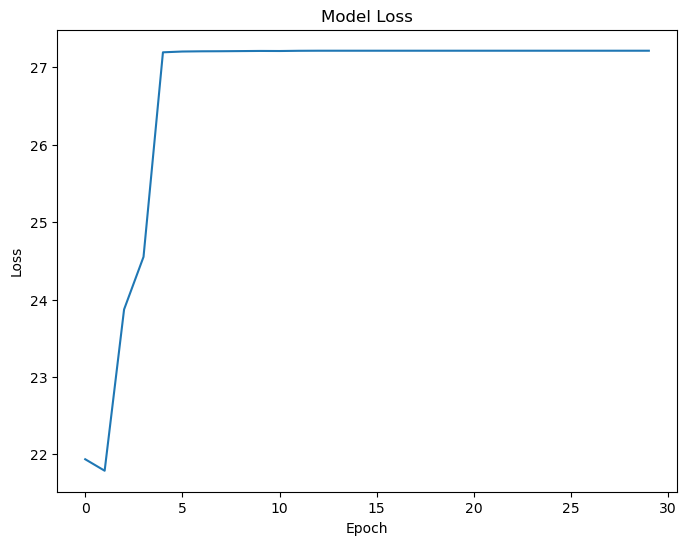

In [527]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [517]:
# Define list of stations names for confusion matrix
stations = {
0: 'BASEL',
1: 'BELGRADE',
2: 'BUDAPEST',
3: 'DEBILT',
4: 'DUSSELDORF',
5: 'HEATHROW',
6: 'KASSEL',
7: 'LJUBLJANA',
8: 'MAASTRICHT',
9: 'MADRID',
10: 'MUNCHENB',
11: 'OSLO',
12: 'SONNBLICK',
13: 'STOCKHOLM',
14: 'VALENTIA'
}

In [502]:
def confusion_matrix(y_true, y_pred):
    y_true = pd.Series([stations[y] for y in np.argmax(y_true, axis=1)])
    y_pred = pd.Series([stations[y] for y in np.argmax(y_pred, axis=1)])

    return pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Pred'])

In [475]:
# Evaluate
print(confusion_matrix(y_test, model.predict(X_test)))

180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
Pred        BUDAPEST  DEBILT  LJUBLJANA  MAASTRICHT  MUNCHENB
True                                                         
BASEL           1410    1011         82           3      1176
BELGRADE         867     223          0           0         2
BUDAPEST         185      29          0           0         0
DEBILT            78       4          0           0         0
DUSSELDORF        25       4          0           0         0
HEATHROW          72      10          0           0         0
KASSEL            11       0          0           0         0
LJUBLJANA         42      19          0           0         0
MAASTRICHT         4       5          0           0         0
MADRID           254     189          2           0        13
MUNCHENB           1       7          0           0         0
OSLO               4       1          0           0         0
STOCKHOLM          3       1          0           0         0
VALENTIA           1       

## 7. CCN w/ More Pooled & Convolution Layers

In [712]:
epochs = 30
batch_size = 16
n_hidden = 64

timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = len(y_train[0])

# Define the input shape
input_shape = (timesteps, input_dim)

# Create the model with additional pooling layers
model = Sequential([
    Input(shape=input_shape),
    Conv1D(n_hidden, kernel_size=2, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=2, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(32, kernel_size=2, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(n_classes, activation='tanh')
])

In [714]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [716]:
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=2)

Epoch 1/30
1076/1076 - 1s - 877us/step - accuracy: 0.5688 - loss: 23.9843
Epoch 2/30
1076/1076 - 1s - 543us/step - accuracy: 0.5725 - loss: 23.9065
Epoch 3/30
1076/1076 - 1s - 556us/step - accuracy: 0.5721 - loss: 23.9065
Epoch 4/30
1076/1076 - 1s - 603us/step - accuracy: 0.5719 - loss: 23.9065
Epoch 5/30
1076/1076 - 1s - 632us/step - accuracy: 0.5719 - loss: 23.9065
Epoch 6/30
1076/1076 - 1s - 641us/step - accuracy: 0.5719 - loss: 23.9065
Epoch 7/30
1076/1076 - 1s - 637us/step - accuracy: 0.5719 - loss: 23.9065
Epoch 8/30
1076/1076 - 1s - 637us/step - accuracy: 0.5719 - loss: 23.9065
Epoch 9/30
1076/1076 - 1s - 640us/step - accuracy: 0.5719 - loss: 23.9065
Epoch 10/30
1076/1076 - 1s - 626us/step - accuracy: 0.5719 - loss: 23.9065
Epoch 11/30
1076/1076 - 1s - 630us/step - accuracy: 0.5719 - loss: 23.9065
Epoch 12/30
1076/1076 - 1s - 548us/step - accuracy: 0.5719 - loss: 23.9065
Epoch 13/30
1076/1076 - 1s - 554us/step - accuracy: 0.5719 - loss: 23.9065
Epoch 14/30
1076/1076 - 1s - 553us

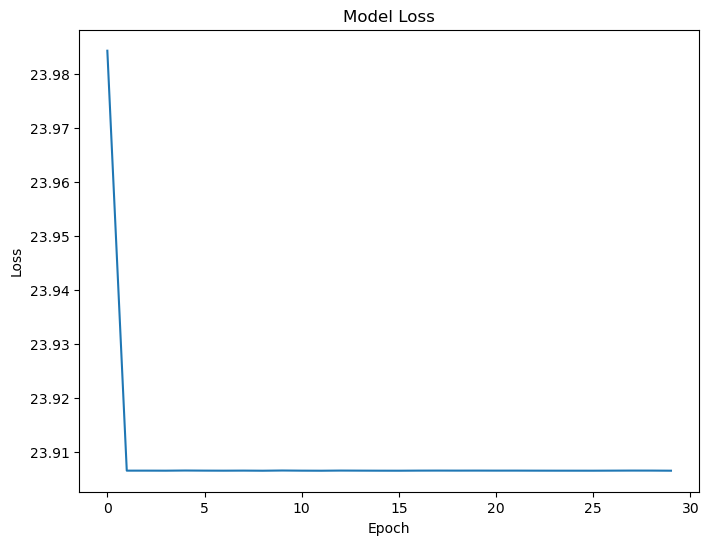

In [718]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [720]:
def confusion_matrix(y_true, y_pred):
    y_true = pd.Series([stations[y] for y in np.argmax(y_true, axis=1)])
    y_pred = pd.Series([stations[y] for y in np.argmax(y_pred, axis=1)])

    return pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Pred'])

In [722]:
# Evaluate
print(confusion_matrix(y_test, model.predict(X_test)))

180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
Pred        BASEL  MADRID
True                     
BASEL        3203     479
BELGRADE     1088       4
BUDAPEST      214       0
DEBILT         82       0
DUSSELDORF     29       0
HEATHROW       82       0
KASSEL         11       0
LJUBLJANA      61       0
MAASTRICHT      9       0
MADRID        436      22
MUNCHENB        8       0
OSLO            5       0
STOCKHOLM       4       0
VALENTIA        1       0


## 8. RNN Model

In [625]:
epochs = 30
batch_size = 32
n_hidden = 64

timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = len(y_train[0])

model = Sequential([
    Input(shape=(timesteps, input_dim)),
    LSTM(n_hidden),
    Dropout(0.5),
    Dense(n_classes, activation='tanh')
])

In [627]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [629]:
history2 = model.fit(X_train,
          y_train,
          batch_size=batch_size,
          validation_data=(X_test, y_test),
          epochs=epochs)

Epoch 1/30
538/538 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2068 - loss: 24.0818 - val_accuracy: 0.1389 - val_loss: 23.9926
Epoch 2/30
538/538 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0940 - loss: 24.9432 - val_accuracy: 0.1900 - val_loss: 30.8309
Epoch 3/30
538/538 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1166 - loss: 24.7778 - val_accuracy: 0.1924 - val_loss: 20.9059
Epoch 4/30
538/538 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1179 - loss: 24.9153 - val_accuracy: 0.2175 - val_loss: 24.6885
Epoch 5/30
538/538 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1121 - loss: 24.8812 - val_accuracy: 0.1889 - val_loss: 31.1146
Epoch 6/30
538/538 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0859 - loss: 24.5273 - val_accuracy: 0.0387 - val_loss: 23.4380
Epoch 7/30
538/538 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0662 - loss: 24.3103 - val_accuracy: 0.0676 - val_loss: 24.4892
Epoch 8/30
538/538 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0588 - loss: 25.2033 - v

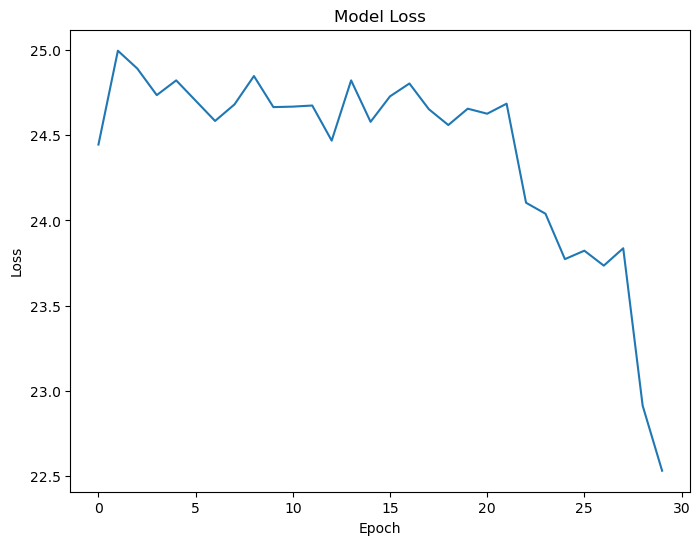

In [631]:
plt.figure(figsize=(8, 6))
plt.plot(history2.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [633]:
def confusion_matrix(y_true, y_pred):
    y_true = pd.Series([stations[y] for y in np.argmax(y_true, axis=1)])
    y_pred = pd.Series([stations[y] for y in np.argmax(y_pred, axis=1)])

    return pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Pred'])

In [635]:
# Evaluate
print(confusion_matrix(y_test, model.predict(X_test)))

180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step
Pred        BASEL  DUSSELDORF  KASSEL  LJUBLJANA  MAASTRICHT  MADRID  OSLO  \
True                                                                         
BASEL          33          57       1        256           1    1665   412   
BELGRADE        0           0       0         63           0     106   166   
BUDAPEST        0           0       0         27           0      13    52   
DEBILT          0           0       0          6           0       0    41   
DUSSELDORF      0           0       0          4           0       1     7   
HEATHROW        0           0       0         19           0       3    17   
KASSEL          0           0       0          3           0       1     0   
LJUBLJANA       0           0       0         22           0       3     3   
MAASTRICHT      0           0       0          1           0       0     1   
MADRID          1           0       0         94           0     143    32   
MUNCHENB        0    

## 9. LSTM Model

In [761]:
epochs = 30
batch_size = 16
n_hidden = 64

timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = len(y_train[0])

model = Sequential()
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim)))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='tanh')) #Don't use relu here!

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [763]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [765]:
history2 = model.fit(X_train,
          y_train,
          batch_size=batch_size,
          validation_data=(X_test, y_test),
          epochs=epochs)

Epoch 1/30
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3307 - loss: 25.0399 - val_accuracy: 0.5535 - val_loss: 26.4056
Epoch 2/30
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4152 - loss: 25.3040 - val_accuracy: 0.6363 - val_loss: 29.7748
Epoch 3/30
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4285 - loss: 24.7438 - val_accuracy: 0.4076 - val_loss: 25.4489
Epoch 4/30
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2769 - loss: 24.9026 - val_accuracy: 0.5324 - val_loss: 26.6126
Epoch 5/30
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3004 - loss: 25.1340 - val_accuracy: 0.0490 - val_loss: 28.4814
Epoch 6/30
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1860 - loss: 24.9025 - val_accuracy: 0.0077 - val_loss: 30.0515
Epoch 7/30
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0307 - loss: 25.0590 - val_accuracy: 8.7138e-04 - val_loss: 27.6468
Epoch 8/30
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0356

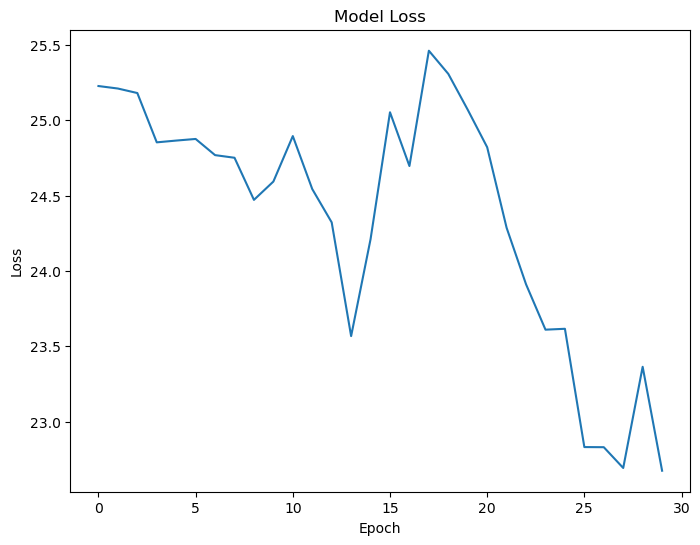

In [767]:
plt.figure(figsize=(8, 6))
plt.plot(history2.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [769]:
def confusion_matrix(y_true, y_pred):
    y_true = pd.Series([stations[y] for y in np.argmax(y_true, axis=1)])
    y_pred = pd.Series([stations[y] for y in np.argmax(y_pred, axis=1)])

    return pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Pred'])

In [771]:
# Evaluate
print(confusion_matrix(y_test, model.predict(X_test)))

180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step
Pred        BASEL  BELGRADE
True                       
BASEL        3677         5
BELGRADE     1092         0
BUDAPEST      214         0
DEBILT         82         0
DUSSELDORF     29         0
HEATHROW       82         0
KASSEL         11         0
LJUBLJANA      61         0
MAASTRICHT      9         0
MADRID        458         0
MUNCHENB        8         0
OSLO            5         0
STOCKHOLM       4         0
VALENTIA        1         0


## 10. RNN on Scaled Data

In [642]:
# Create a StandardScaler object
scaler = StandardScaler()

# Transform both training and test data
X_train_scaled = np.zeros_like(X_train)
X_test_scaled = np.zeros_like(X_test)

for i in range(X_train.shape[2]):
    X_train_scaled[:,:,i] = scaler.fit_transform(X_train[:,:,i])
    X_test_scaled[:,:,i] = scaler.transform(X_test[:,:,i])

In [672]:
epochs = 30
batch_size = 32
n_hidden = 64

timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = len(y_train[0])

model = Sequential([
    Input(shape=(timesteps, input_dim)),
    LSTM(n_hidden),
    Dropout(0.5),
    Dense(n_classes, activation='tanh')
])

In [674]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [676]:
history3 = model.fit(X_train,
          y_train,
          batch_size=batch_size,
          validation_data=(X_test, y_test),
          epochs=epochs)

Epoch 1/30
538/538 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0605 - loss: 25.3498 - val_accuracy: 0.0019 - val_loss: 24.6710
Epoch 2/30
538/538 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0070 - loss: 24.7409 - val_accuracy: 0.0019 - val_loss: 28.9606
Epoch 3/30
538/538 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0552 - loss: 24.9874 - val_accuracy: 0.0030 - val_loss: 33.4108
Epoch 4/30
538/538 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0168 - loss: 25.0488 - val_accuracy: 0.0019 - val_loss: 25.5658
Epoch 5/30
538/538 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0132 - loss: 25.0616 - val_accuracy: 0.0028 - val_loss: 21.8670
Epoch 6/30
538/538 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0163 - loss: 24.7265 - val_accuracy: 0.0049 - val_loss: 24.2670
Epoch 7/30
538/538 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0403 - loss: 24.8276 - val_accuracy: 0.0023 - val_loss: 22.1994
Epoch 8/30
538/538 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0757 - loss: 25.0745 - v

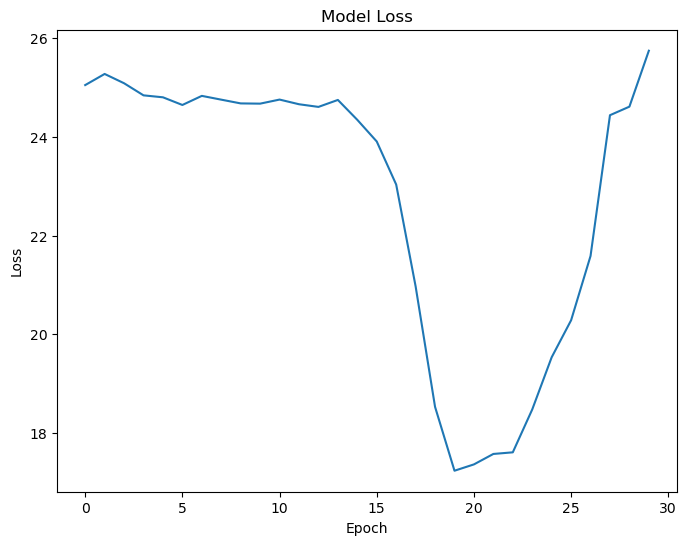

In [678]:
plt.figure(figsize=(8, 6))
plt.plot(history3.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [680]:
def confusion_matrix(y_true, y_pred):
    y_true = pd.Series([stations[y] for y in np.argmax(y_true, axis=1)])
    y_pred = pd.Series([stations[y] for y in np.argmax(y_pred, axis=1)])

    return pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Pred'])

In [682]:
# Evaluate
print(confusion_matrix(y_test, model.predict(X_test)))

180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step
Pred        BUDAPEST  KASSEL  MAASTRICHT  MADRID  MUNCHENB  OSLO  STOCKHOLM  \
True                                                                          
BASEL             25       5          14    3543        65    23          6   
BELGRADE           0       0           0    1061        31     0          0   
BUDAPEST           0       0           0     206         8     0          0   
DEBILT             0       0           0      76         6     0          0   
DUSSELDORF         0       0           0      28         1     0          0   
HEATHROW           0       0           0      76         6     0          0   
KASSEL             0       0           0      11         0     0          0   
LJUBLJANA          0       0           0      60         1     0          0   
MAASTRICHT         0       0           0       8         1     0          0   
MADRID             1       0           0     440        17     0          0   
MUNCHENB 

## 11. Export Datasets

In [109]:
cl_4.to_parquet(os.path.join(path, '01 Datasets', '02 Prepared Data', 'weather_unscaled_clean.parquet'))